# 1/ import package

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import urllib.request
import sqlite3


# 2 / Importer le site avec les 5 pages
### création d'une liste url de page 1 à 201 avec un saut de 5O( 50 elèments par pages)

In [3]:
urls= []
for i in range(1, 202, 50):
    url=f"https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start={i}&ref_=adv_nxt" 
    urls.append(url)
urls

['https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=1&ref_=adv_nxt',
 'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=51&ref_=adv_nxt',
 'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=101&ref_=adv_nxt',
 'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=151&ref_=adv_nxt',
 'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=201&ref_=adv_nxt']

## if response(l'object) est ok, écrit le code 2OO = no problem
### requests pour placer le contenu de la page web dans la variable df.

In [4]:
for url in urls :
    pagelink = urllib.request.urlopen(url)
    soup = BeautifulSoup(pagelink, 'html.parser')
    response = requests.get(url)
    
    if response.ok:
        print(response)
    df = requests.get(url)
    print(url)

<Response [200]>
https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=1&ref_=adv_nxt
<Response [200]>
https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=51&ref_=adv_nxt
<Response [200]>
https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=101&ref_=adv_nxt
<Response [200]>
https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=151&ref_=adv_nxt
<Response [200]>
https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=201&ref_=adv_nxt


### Affiche l'ensemble des headers

In [5]:
#df.headers

### Affiche les balises

In [6]:
#df.content

### Ecrit le code html de la page

In [7]:
#print(df.text)

### Affiche le code html mais maintenant possiblilité de faire des sélections dans la page

In [8]:
soup = BeautifulSoup
print(soup)

<class 'bs4.BeautifulSoup'>


###  Rend le contenu facilement interrogeable par les différentes fonctions offertes par BeautifulSoup. Ces fonctions vont pouvoir être appliquées à la variable soup.


In [9]:
soup = BeautifulSoup(df.text,"html.parser")

### Affiche le titre .find pour localiser un élèment en fonction d'un selecteur CSS

In [10]:
title=soup.find("title")
print(title)

<title>IMDb "Top 250"
(Sorted by IMDb Rating Descending) - IMDb</title>


### Selection de l'elèment d'une class (html) dans le site 

In [11]:
variable = soup.find_all('div', attrs={'class': 'lister-item mode-advanced'})
print(variable)

[<div class="lister-item mode-advanced">
<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt0395169"></div>
</div>
<div class="lister-item-image float-left">
<a href="/title/tt0395169/"> <img alt="Hôtel Rwanda" class="loadlate" data-tconst="tt0395169" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BZGJjYmIzZmQtNWE4Yy00ZGVmLWJkZGEtMzUzNmQ4ZWFlMjRhXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png" width="67"/>
</a> </div>
<div class="lister-item-content">
<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">201.</span>
<a href="/title/tt0395169/">Hôtel Rwanda</a>
<span class="lister-item-year text-muted unbold">(2004)</span>
</h3>
<p class="text-muted">
<span class="certificate">Tous Public</span>
<span class="ghost">|</span>
<span class="runtime">121 min</span>
<span class="ghost">|</span>
<span class="genre">
Biography, Dram

### le contenu qui nous intéresse se trouve dans une balise très commune donc faire une boucle for
### séparer les élèments par des -----

In [12]:
for i in variable:
    print(i)
    print("-"*100)


<div class="lister-item mode-advanced">
<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt0395169"></div>
</div>
<div class="lister-item-image float-left">
<a href="/title/tt0395169/"> <img alt="Hôtel Rwanda" class="loadlate" data-tconst="tt0395169" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BZGJjYmIzZmQtNWE4Yy00ZGVmLWJkZGEtMzUzNmQ4ZWFlMjRhXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png" width="67"/>
</a> </div>
<div class="lister-item-content">
<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">201.</span>
<a href="/title/tt0395169/">Hôtel Rwanda</a>
<span class="lister-item-year text-muted unbold">(2004)</span>
</h3>
<p class="text-muted">
<span class="certificate">Tous Public</span>
<span class="ghost">|</span>
<span class="runtime">121 min</span>
<span class="ghost">|</span>
<span class="genre">
Biography, Drama

# 3 / WEB SCRAPING 
### boucle sur les 5 pages


In [13]:
for url in urls :
    print(url)
    pagelink = urllib.request.urlopen(url)

    soup = BeautifulSoup(pagelink, 'html.parser')
    movies = soup.find_all('div', attrs={'class': 'lister-item mode-advanced'})
    

    print(type(movies))
        

https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=1&ref_=adv_nxt
<class 'bs4.element.ResultSet'>
https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=51&ref_=adv_nxt
<class 'bs4.element.ResultSet'>
https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=101&ref_=adv_nxt
<class 'bs4.element.ResultSet'>
https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=151&ref_=adv_nxt
<class 'bs4.element.ResultSet'>
https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=201&ref_=adv_nxt
<class 'bs4.element.ResultSet'>


### Selection des élèments importants: Titre / Année /Stars /Nombre de vote/Réalisateur/Recette

In [14]:
movies_id =0
for url in urls :
    pagelink = urllib.request.urlopen(url)
    soup = BeautifulSoup(pagelink, 'html.parser')
    response = requests.get(url)
    
    if response.ok:
        print(response)
    df = requests.get(url)
    
    print(url)
    pagelink = urllib.request.urlopen(url)

    soup = BeautifulSoup(pagelink, 'html.parser')
    movies = soup.find_all('div', attrs={'class': 'lister-item mode-advanced'})
    
    for i in movies:
        movies_id = movies_id + 1
        i = list(i)

        print(f"id > {movies_id}")
        #print(i[3])
        title = i[3].find('img', attrs={'class': 'loadlate'})['alt']
        print(f"title > {title}")

        #print(i[5])
        year = i[5].find('span', attrs={'class': 'lister-item-year text-muted unbold'})
        year = year.text
        year = year.replace("(","")
        year = year.replace(")","")
        print(f"year > {year}")

        rating = i[5].find('div', attrs={'class': 'inline-block ratings-imdb-rating'})
        rating = rating.text
        rating= rating.strip()
        print(f"rating > {rating}")

        nb_de_vote = i[5].find('meta', attrs={'itemprop': 'ratingCount'})['content']
        print(f"nb_de_vote > {nb_de_vote}")

        value = i[5].find_all('span')[-1:][0]["data-value"].replace(",","")
        print(value)

        #value = i[5] #on récup index 5 i (i = liste)
        #print(value)
        #value = value.find_all('span') #on cherche tout les splan
        #print(value)
        #value = value[-1:] #dernier span element de la liste
        #print(value)
        #value = value[0] # on prend le seul élement de la liste
        #print(value)
        #value = value["data-value"]# on recup la valeur de data value
        #print(value)
        #value = value.replace(",","") #on supprime les virgules
        #print(value)

        realisator = i[5].find_all('p', attrs={'class': ''})
        realisator = str(realisator[0]).split('|')[0]
        realisator = BeautifulSoup(realisator, 'html.parser')
        realisator1 = realisator.find_all('a')[0].text
        print(f"realisator1 > {realisator1}")
        with connexion:
            c.execute("INSERT INTO realisators(name, movies_id) VALUES (?,?)",(realisator1, movies_id))

        try:
            realisator2 = realisator.find_all('a')[1].text
            print(f"realisator2 > {realisator2}")
            with connexion:
                c.execute("INSERT INTO realisators(name, movies_id) VALUES (?,?)",(realisator2, movies_id))

            try:
                realisator3 = realisator.find_all('a')[2].text
                print(f"realisator3 > {realisator3}")
                with connexion:
                    c.execute("INSERT INTO realisators(name, movies_id) VALUES (?,?)",(realisator3, movies_id))

                try:
                    realisator4 = realisator.find_all('a')[3].text
                    print(f"realisator4 > {realisator4}")
                    with connexion:
                        c.execute("INSERT INTO realisators(name, movies_id) VALUES (?,?)",(realisator4, movies_id))

                except:
                    pass
            except:
                pass
        except: 
            pass

        
        with connexion:
            c.execute("INSERT INTO movies (title, year, rating, nb_de_vote,value) VALUES (?,?,?,?,?)",(title,year,rating,nb_de_vote,value))
            print("insert DB ok")

        print("-"*100)
        
        
        
print(movies_id)

<Response [200]>
https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=1&ref_=adv_nxt
id > 1
title > Les Évadés
year > 1994
rating > 9.3
nb_de_vote > 2387274
28341469
realisator1 > Frank Darabont


NameError: name 'connexion' is not defined

# 4 / Création de la base de donnée SQL

In [163]:
#on se connecte au fichier DB
try:
    connexion = sqlite3.connect("IMDB.db")
    c = connexion.cursor()
    print("OK")
except:
    print('errorr')

OK


In [138]:
#création de table
with connexion:
    connexion.execute("""CREATE TABLE IF NOT EXISTS movies (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    title TEXT,
    year INTEGER,
    rating FLOAT,
    nb_de_vote INTEGER,
    value FLOAT
    );""")
    
    connexion.execute("""CREATE TABLE IF NOT EXISTS realisators (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT,
    movies_id INT
    );""")


In [139]:
#ajout d'une ligne dans la bdd avec les valeurs

#title,year,rating,nb_de_vote,value = "test",1500,50,5000,500

#with connexion:
#    c.execute("INSERT INTO movies (title, year, rating, nb_de_vote,value) VALUES (?,?,?,?,?)", (title,year,rating,nb_de_vote,value))

#  5 /Analyse de la donnée par requête SQL sur la base de donnée SQL

In [140]:
#execution d'une requête
with connexion:
    c.execute("SELECT title FROM movies")
    result = c.fetchall()
    

# 6/ Stockage de base de donnée en DataFrame

In [141]:
#mettre une requete SQL sous dataframe
df = pd.read_sql("SELECT * FROM movies;", connexion)
df


,id,title,year,public,runtime,rating,total_rating,value,synopsis,img
0,1,Les Évadés,1994,Tous publics,142,9.3,2387274,28.34,Two imprisoned men bond over a number of years...,https://m.media-amazon.com/images/M/MV5BMDFkYT...
1,2,Le parrain,1972,12,175,9.2,1654566,134.97,An organized crime dynasty's aging patriarch t...,https://m.media-amazon.com/images/M/MV5BM2MyNj...
2,3,The Dark Knight : Le Chevalier noir,2008,Tous publics,152,9.0,2350355,534.86,When the menace known as the Joker wreaks havo...,https://m.media-amazon.com/images/M/MV5BMTMxNT...
3,4,"Le parrain, 2ème partie",1974,Tous publics,202,9.0,1150887,57.30,The early life and career of Vito Corleone in ...,https://m.media-amazon.com/images/M/MV5BMWMwMG...
4,5,12 Hommes en colère,1957,Tous publics,96,9.0,704715,4.36,A jury holdout attempts to prevent a miscarria...,https://m.media-amazon.com/images/M/MV5BMWU4N2...
...,...,...,...,...,...,...,...,...,...,...
995,996,Diamants sur canapé,1961,Tous publics,115,7.6,169301,69.30,A young New York socialite becomes interested ...,https://m.media-amazon.com/images/M/MV5BNGEwMT...
996,997,Géant,1956,Tous publics,201,7.6,34697,4.69,Sprawling epic covering the life of a Texas ca...,https://m.media-amazon.com/images/M/MV5BODk3Yj...
997,998,Tant qu'il y aura des hommes,1953,Tous publics,118,7.6,44010,30.50,"In Hawaii in 1941, a private is cruelly punish...",https://m.media-amazon.com/images/M/MV5BM2U3Yz...
998,999,Lifeboat,1944,Tous publics,97,7.6,26857,6.85,Several survivors of a torpedoed merchant ship...,https://m.media-amazon.com/images/M/MV5BZTBmMj...


### Visualisation du df

In [142]:
df.describe(include="all")

,id,title,year,public,runtime,rating,total_rating,value,synopsis,img
count,1000.000000,1000,1000.000000,1000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000,1000
unique,NaN,997,NaN,19,NaN,NaN,NaN,NaN,1000,1000
top,NaN,Scarface,NaN,Tous publics,NaN,NaN,NaN,NaN,A young African-American visits his white girl...,https://m.media-amazon.com/images/M/MV5BMTk3OT...
freq,NaN,2,NaN,678,NaN,NaN,NaN,NaN,1,1
mean,500.500000,NaN,1926.873000,NaN,123.203000,7.95170,2.790298e+05,58.525670,NaN,NaN
std,288.819436,NaN,351.453793,NaN,28.357255,0.27403,3.334594e+05,102.542263,NaN,NaN
min,1.000000,NaN,-1.000000,NaN,45.000000,7.60000,2.526600e+04,0.000000,NaN,NaN
25%,250.750000,NaN,1972.000000,NaN,103.000000,7.70000,5.607975e+04,3.247500,NaN,NaN
50%,500.500000,NaN,1997.000000,NaN,119.000000,7.90000,1.419265e+05,13.405000,NaN,NaN
75%,750.250000,NaN,2009.000000,NaN,137.000000,8.10000,3.810360e+05,66.707500,NaN,NaN


# 7/ Data VIZ

### 1ere observation avec un tableau de corrélation

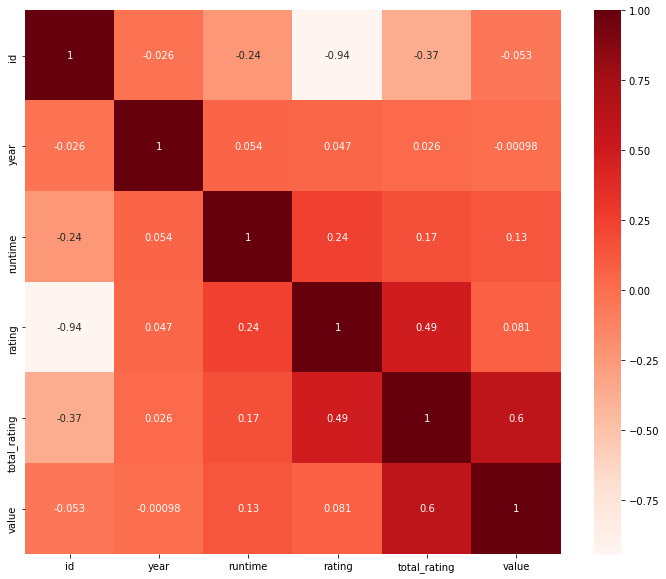

In [143]:
# tableau de corrélation ( si supérieur à 0,5 il y a dejà une bonne corrélation)

plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [144]:
df.dtypes

id                int64
title            object
year              int64
public           object
runtime           int64
rating          float64
total_rating      int64
value           float64
synopsis         object
img              object
dtype: object

In [145]:
# Valeurs 
df = pd.read_sql("SELECT * FROM movies WHERE year!=-1;", connexion)
df

,id,title,year,public,runtime,rating,total_rating,value,synopsis,img
0,1,Les Évadés,1994,Tous publics,142,9.3,2387274,28.34,Two imprisoned men bond over a number of years...,https://m.media-amazon.com/images/M/MV5BMDFkYT...
1,2,Le parrain,1972,12,175,9.2,1654566,134.97,An organized crime dynasty's aging patriarch t...,https://m.media-amazon.com/images/M/MV5BM2MyNj...
2,3,The Dark Knight : Le Chevalier noir,2008,Tous publics,152,9.0,2350355,534.86,When the menace known as the Joker wreaks havo...,https://m.media-amazon.com/images/M/MV5BMTMxNT...
3,4,"Le parrain, 2ème partie",1974,Tous publics,202,9.0,1150887,57.30,The early life and career of Vito Corleone in ...,https://m.media-amazon.com/images/M/MV5BMWMwMG...
4,5,12 Hommes en colère,1957,Tous publics,96,9.0,704715,4.36,A jury holdout attempts to prevent a miscarria...,https://m.media-amazon.com/images/M/MV5BMWU4N2...
...,...,...,...,...,...,...,...,...,...,...
963,996,Diamants sur canapé,1961,Tous publics,115,7.6,169301,69.30,A young New York socialite becomes interested ...,https://m.media-amazon.com/images/M/MV5BNGEwMT...
964,997,Géant,1956,Tous publics,201,7.6,34697,4.69,Sprawling epic covering the life of a Texas ca...,https://m.media-amazon.com/images/M/MV5BODk3Yj...
965,998,Tant qu'il y aura des hommes,1953,Tous publics,118,7.6,44010,30.50,"In Hawaii in 1941, a private is cruelly punish...",https://m.media-amazon.com/images/M/MV5BM2U3Yz...
966,999,Lifeboat,1944,Tous publics,97,7.6,26857,6.85,Several survivors of a torpedoed merchant ship...,https://m.media-amazon.com/images/M/MV5BZTBmMj...


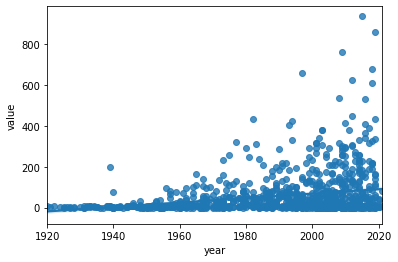

In [146]:
ax = sns.regplot(x="year", y="value", data=df)

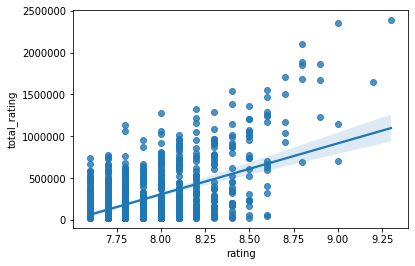

In [147]:
ax = sns.regplot(x="rating", y="total_rating", data=df)

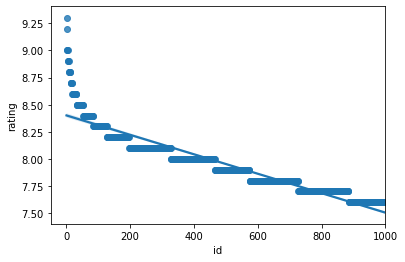

In [164]:
ax = sns.regplot(x="id", y="rating", data=df)

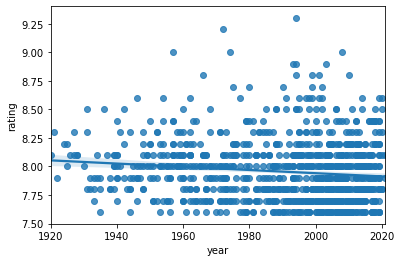

In [149]:
ax = sns.regplot(x="year", y="rating", data=df)


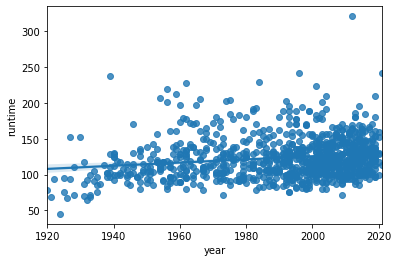

In [150]:
ax = sns.regplot(x="year", y="runtime", data=df)


In [151]:
with connexion:  
    c.execute("UPDATE movies SET public = 'Tous publics' WHERE public = 'Tous Public';")
    c.execute("SELECT public, COUNT(*) as NB FROM movies GROUP BY public ORDER BY NB asc;")
    result = c.fetchall()

In [152]:
result

[('10', 1),
 ('6+', 1),
 ('PG', 1),
 ('X', 1),
 ('(Banned)', 2),
 ('7', 2),
 ('Not Rated', 2),
 ('16 avec avertissement', 3),
 ('PG-13', 5),
 ('Unrated', 5),
 ('12 avec avertissement', 6),
 ('18', 6),
 ('13', 15),
 ('R', 15),
 ('Tous publics avec avertissement', 42),
 ('16', 43),
 ('NaN', 58),
 ('12', 114),
 ('Tous publics', 678)]

In [153]:
list_names_movies = []
list_nb_movies = []
others = 0

for element in result:
    if element[1]<16:
        others += element[1]
    else:
        list_names_movies.append(element[0])
        list_nb_movies.append(element[1])
list_names_movies.append("others")
list_nb_movies.append(others)
    
print(list_names_movies) 
print(list_nb_movies)
        

['Tous publics avec avertissement', '16', 'NaN', '12', 'Tous publics', 'others']
[42, 43, 58, 114, 678, 65]


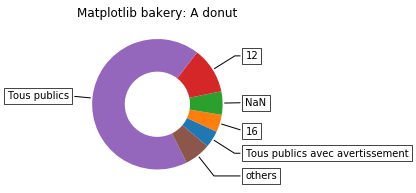

In [154]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = list_names_movies

data = list_nb_movies

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Matplotlib bakery: A donut")

plt.show()

In [155]:
############################################################
with connexion:
    c.execute("SELECT m.range as [year_range], count(*), avg(value)\
    FROM (SELECT case\
    WHEN year BETWEEN 1920 AND 1939 THEN '1920'\
    WHEN year BETWEEN 1930 AND 1949 THEN '1930'\
    WHEN year BETWEEN 1940 AND 1959 THEN '1940'\
    WHEN year BETWEEN 1950 AND 1969 THEN '1950'\
    WHEN year BETWEEN 1960 AND 1979 THEN '1960'\
    WHEN year BETWEEN 1970 AND 1989 THEN '1970'\
    WHEN year BETWEEN 1980 AND 1999 THEN '1980'\
    WHEN year BETWEEN 1990 AND 2009 THEN '1990'\
    WHEN year BETWEEN 2000 AND 2019 THEN '2000'\
    WHEN year BETWEEN 2010 AND 2019 THEN '2010'\
    WHEN year BETWEEN 2020 AND 2029 THEN '2020'\
    END as range, value as value\
    FROM movies\
    ) m GROUP BY m.range;")
    films_by_years = c.fetchall()
films_by_years = films_by_years[1:]
print(films_by_years)

[('1920', 35, 9.468285714285717), ('1930', 36, 7.653055555555557), ('1940', 56, 13.058571428571431), ('1950', 72, 26.900416666666658), ('1960', 75, 43.03986666666666), ('1970', 89, 57.75269662921347), ('1980', 148, 57.92141891891891), ('1990', 231, 65.14199134199133), ('2000', 218, 95.85334862385328), ('2020', 8, 23.374999999999996)]


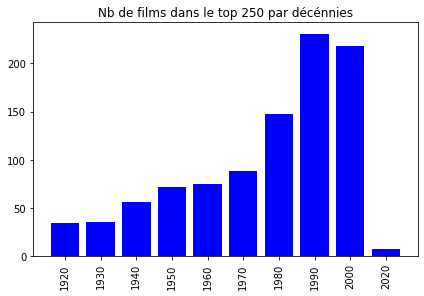

In [156]:
x,y,z = zip(*films_by_years)
plt.bar(x, y, color='b')
plt.xticks(x, x, rotation='vertical')
plt.tight_layout()
plt.title('Nb de films dans le top 250 par décénnies')
plt.show()

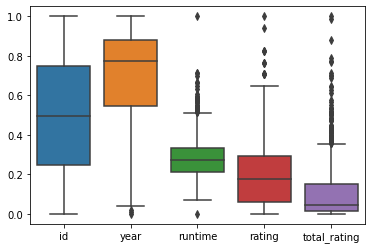

In [157]:
#repartition des données par colomnes (valeur min : 0 / valeur max : 1)
dftempo = df
dftempo = dftempo.drop(['value'], axis = 1)


for i in ['id','runtime','rating','total_rating','year']:
    id_list = list(df[i])
    id_list = [((i/min(id_list))-1)/((max(id_list)/min(id_list))-1) for i in id_list]
    dftempo[i] = id_list


sns.boxplot(data=dftempo)

In [158]:
dftempo

,id,title,year,public,runtime,rating,total_rating,synopsis,img
0,0.000000,Les Évadés,0.732673,Tous publics,0.351449,1.000000,1.000000,Two imprisoned men bond over a number of years...,https://m.media-amazon.com/images/M/MV5BMDFkYT...
1,0.001001,Le parrain,0.514851,12,0.471014,0.941176,0.689794,An organized crime dynasty's aging patriarch t...,https://m.media-amazon.com/images/M/MV5BM2MyNj...
2,0.002002,The Dark Knight : Le Chevalier noir,0.871287,Tous publics,0.387681,0.823529,0.984370,When the menace known as the Joker wreaks havo...,https://m.media-amazon.com/images/M/MV5BMTMxNT...
3,0.003003,"Le parrain, 2ème partie",0.534653,Tous publics,0.568841,0.823529,0.476553,The early life and career of Vito Corleone in ...,https://m.media-amazon.com/images/M/MV5BMWMwMG...
4,0.004004,12 Hommes en colère,0.366337,Tous publics,0.184783,0.823529,0.287657,A jury holdout attempts to prevent a miscarria...,https://m.media-amazon.com/images/M/MV5BMWU4N2...
...,...,...,...,...,...,...,...,...,...
963,0.995996,Diamants sur canapé,0.405941,Tous publics,0.253623,0.000000,0.060980,A young New York socialite becomes interested ...,https://m.media-amazon.com/images/M/MV5BNGEwMT...
964,0.996997,Géant,0.356436,Tous publics,0.565217,0.000000,0.003993,Sprawling epic covering the life of a Texas ca...,https://m.media-amazon.com/images/M/MV5BODk3Yj...
965,0.997998,Tant qu'il y aura des hommes,0.326733,Tous publics,0.264493,0.000000,0.007936,"In Hawaii in 1941, a private is cruelly punish...",https://m.media-amazon.com/images/M/MV5BM2U3Yz...
966,0.998999,Lifeboat,0.237624,Tous publics,0.188406,0.000000,0.000674,Several survivors of a torpedoed merchant ship...,https://m.media-amazon.com/images/M/MV5BZTBmMj...


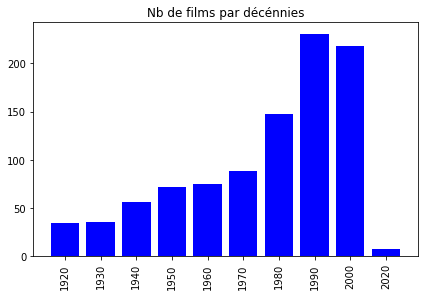

In [159]:
x,y,z = zip(*films_by_years)
plt.bar(x, y, color='b')
plt.xticks(x, x, rotation='vertical')
plt.tight_layout()
plt.title('Nb de films par décénnies')
plt.show()


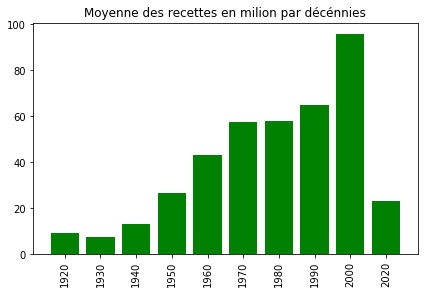

In [160]:
x,y,z = zip(*films_by_years)
plt.bar(x, z, color='g')
plt.xticks(x, x, rotation='vertical')
plt.tight_layout()
plt.title('Moyenne des recettes en milion par décénnies')
plt.show()

In [161]:
df


,id,title,year,public,runtime,rating,total_rating,value,synopsis,img
0,1,Les Évadés,1994,Tous publics,142,9.3,2387274,28.34,Two imprisoned men bond over a number of years...,https://m.media-amazon.com/images/M/MV5BMDFkYT...
1,2,Le parrain,1972,12,175,9.2,1654566,134.97,An organized crime dynasty's aging patriarch t...,https://m.media-amazon.com/images/M/MV5BM2MyNj...
2,3,The Dark Knight : Le Chevalier noir,2008,Tous publics,152,9.0,2350355,534.86,When the menace known as the Joker wreaks havo...,https://m.media-amazon.com/images/M/MV5BMTMxNT...
3,4,"Le parrain, 2ème partie",1974,Tous publics,202,9.0,1150887,57.30,The early life and career of Vito Corleone in ...,https://m.media-amazon.com/images/M/MV5BMWMwMG...
4,5,12 Hommes en colère,1957,Tous publics,96,9.0,704715,4.36,A jury holdout attempts to prevent a miscarria...,https://m.media-amazon.com/images/M/MV5BMWU4N2...
...,...,...,...,...,...,...,...,...,...,...
963,996,Diamants sur canapé,1961,Tous publics,115,7.6,169301,69.30,A young New York socialite becomes interested ...,https://m.media-amazon.com/images/M/MV5BNGEwMT...
964,997,Géant,1956,Tous publics,201,7.6,34697,4.69,Sprawling epic covering the life of a Texas ca...,https://m.media-amazon.com/images/M/MV5BODk3Yj...
965,998,Tant qu'il y aura des hommes,1953,Tous publics,118,7.6,44010,30.50,"In Hawaii in 1941, a private is cruelly punish...",https://m.media-amazon.com/images/M/MV5BM2U3Yz...
966,999,Lifeboat,1944,Tous publics,97,7.6,26857,6.85,Several survivors of a torpedoed merchant ship...,https://m.media-amazon.com/images/M/MV5BZTBmMj...


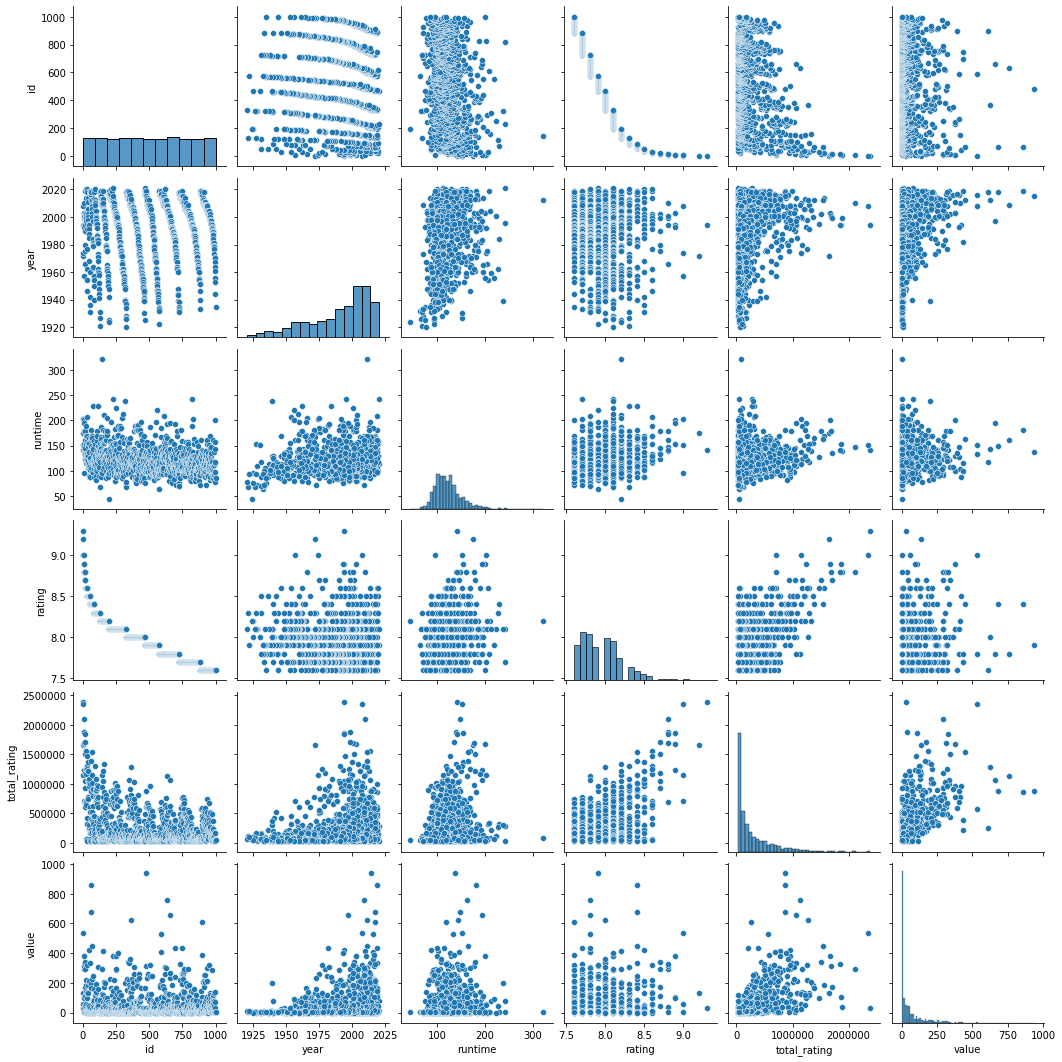

In [162]:
sns.pairplot(df, height=2.5)